In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!git clone https://github.com/musheera2/underwater_image_enhancement.git

fatal: destination path 'underwater_image_enhancement' already exists and is not an empty directory.


In [3]:
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout,BatchNormalization,MaxPool2D
from tensorflow.keras.preprocessing.image import load_img
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing.image import img_to_array

Training Data Set

In [4]:
DATASET="./underwater_image_enhancement/Dataset/Train/"

CATEGORIES=["Corals", "Crabs", "Dolphin", "Eel", "Jelly Fish", "Lobster", "Nudibranchs", "Octopus", "Penguin", "Puffers", "Sea Rays", "Sea Urchins", "Seahorse", "Seal", "Sharks", "Squid", "Starfish", "Turtle_Tortoise", "Whale"]
#ten types of leaf diseases       
train_data=[]

for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        for img_file in random.choices(os.listdir(path),k=450):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(128,128))            
            train_data.append([img,label])

In [5]:
len(train_data)

8550

Test Data

In [6]:
DATASET="underwater_image_enhancement/Dataset/Test/"

CATEGORIES=["Corals", "Crabs", "Dolphin", "Eel", "Jelly Fish", "Lobster", "Nudibranchs", "Octopus", "Penguin", "Puffers", "Sea Rays", "Sea Urchins", "Seahorse", "Seal", "Sharks", "Squid", "Starfish", "Turtle_Tortoise", "Whale"]
#ten types of leaf diseases       
test_data=[]

for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        for img_file in random.choices(os.listdir(path),k=100):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(128,128))            
            test_data.append([img,label])

In [7]:
print(len(train_data)) # size of train dataset
print(len(test_data))  # size of validation dataset

8550
1900


In [8]:
print(f"The shape of the Training Data:\n")
train_data[0][0].shape

The shape of the Training Data:



(128, 128, 3)

Validation Data

In [9]:
val_data=[]
DATASET="./underwater_image_enhancement/Dataset/Val/"

CATEGORIES=["Corals", "Crabs", "Dolphin", "Eel", "Jelly Fish", "Lobster", "Nudibranchs", "Octopus", "Penguin", "Puffers", "Sea Rays", "Sea Urchins", "Seahorse", "Seal", "Sharks", "Squid", "Starfish", "Turtle_Tortoise", "Whale"]
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        for img_file in random.choices(os.listdir(path),k=100):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(128,128))
            val_data.append([img,label])
            
print(len(train_data)) # size of train dataset
print(len(test_data))
print(len(val_data))# size of validation dataset

8550
1900
1900


Performing Train_Test_Val splitting

In [10]:
import random

random.shuffle(train_data)
random.shuffle(test_data)

    
X_train=[]
y_train=[]

for features,label in train_data:
    X_train.append(features)
    y_train.append(label)

In [11]:
Y=[]
for i in y_train:
    if i==0:
        Y.append("Corals")
    elif i==1:
        Y.append("Crabs")
    elif i==2:
        Y.append("Dolphin")
    elif i==3:
        Y.append("Eel")
    elif i==4:
        Y.append("Jelly Fish")
    elif i==5:
        Y.append("Lobster")
    elif i==6:
        Y.append("Nudibranchs")
    elif i==7:
        Y.append("Octopus")
    elif i==8:
        Y.append("Penguin")
    elif i==9:
        Y.append("Puffers")
    elif i==10:
        Y.append("Sea Rays")
    elif i==11:
        Y.append("Sea Urchins")
    elif i==12:
        Y.append("Seahorse")
    elif i==13:
        Y.append("Seal")
    elif i==14:
        Y.append("Sharks")
    elif i==15:
        Y.append("Squid")
    elif i==16:
        Y.append("Starfish")
    elif i==17:
        Y.append("Turtle_Tortoise")
    else:
        Y.append("Whale")

len(X_train),len(y_train)

(8550, 8550)

In [12]:
X_test=[]
y_test=[]

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)
    
Z=[]
for i in y_test:
    if i==0:
        Z.append("Corals")
    elif i==1:
        Z.append("Crabs")
    elif i==2:
        Z.append("Dolphin")
    elif i==3:
        Z.append("Eel")
    elif i==4:
        Z.append("Jelly Fish")
    elif i==5:
        Z.append("Lobster")
    elif i==6:
        Z.append("Nudibranchs")
    elif i==7:
        Z.append("Octopus")
    elif i==8:
        Z.append("Penguin")
    elif i==9:
        Z.append("Puffers")
    elif i==10:
        Z.append("Sea Rays")
    elif i==11:
        Z.append("Sea Urchins")
    elif i==12:
        Z.append("Seahorse")
    elif i==13:
        Z.append("Seal")
    elif i==14:
        Z.append("Sharks")
    elif i==15:
        Z.append("Squid")
    elif i==16:
        Z.append("Starfish")
    elif i==17:
        Z.append("Turtle_Tortoise")
    else:
        Z.append("Whale")


len(X_test),len(y_test)

(1900, 1900)

In [13]:
X_val=[]
y_val=[]

for features,label in val_data:
    X_val.append(features)
    y_val.append(label)
    
Z=[]
for i in y_val:
    if i==0:
        Z.append("Corals")
    elif i==1:
        Z.append("Crabs")
    elif i==2:
        Z.append("Dolphin")
    elif i==3:
        Z.append("Eel")
    elif i==4:
        Z.append("Jelly Fish")
    elif i==5:
        Z.append("Lobster")
    elif i==6:
        Z.append("Nudibranchs")
    elif i==7:
        Z.append("Octopus")
    elif i==8:
        Z.append("Penguin")
    elif i==9:
        Z.append("Puffers")
    elif i==10:
        Z.append("Sea Rays")
    elif i==11:
        Z.append("Sea Urchins")
    elif i==12:
        Z.append("Seahorse")
    elif i==13:
        Z.append("Seal")
    elif i==14:
        Z.append("Sharks")
    elif i==15:
        Z.append("Squid")
    elif i==16:
        Z.append("Starfish")
    elif i==17:
        Z.append("Turtle_Tortoise")
    else:
        Z.append("Whale")


len(X_val),len(y_val)

(1900, 1900)

## Normalizing the data

In [14]:
X_train=np.array(X_train).reshape(-1,128,128,3)
X_train=X_train/255.0
print(X_train.shape)

X_test=np.array(X_test).reshape(-1,128,128,3)
X_test=X_test/255.0
print(X_test.shape)

X_val=np.array(X_val).reshape(-1,128,128,3)
X_val=X_val/255.0
print(X_val.shape)


(8550, 128, 128, 3)
(1900, 128, 128, 3)
(1900, 128, 128, 3)


One hot Encoding the labels of Train, Test, Val

In [15]:
y_train=to_categorical(y_train)


y_test=to_categorical(y_test)
y_val = to_categorical(y_val)

In [16]:
from keras import applications
from keras.applications.resnet import ResNet50
import warnings
warnings.filterwarnings("ignore")

img_height,img_width = 128,128 
num_classes = 19
#If imagenet weights are being loaded, 
#input must have a static square shape (one of (128, 128), (160, 160), (192, 192), or (224, 224))
base_model = ResNet50(weights= None, include_top=False, input_shape= (img_height,img_width,3))

2023-01-22 13:05:37.270079: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-22 13:05:37.271010: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-22 13:05:37.352204: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-22 13:05:37.353029: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-22 13:05:37.353792: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [17]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

In [18]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

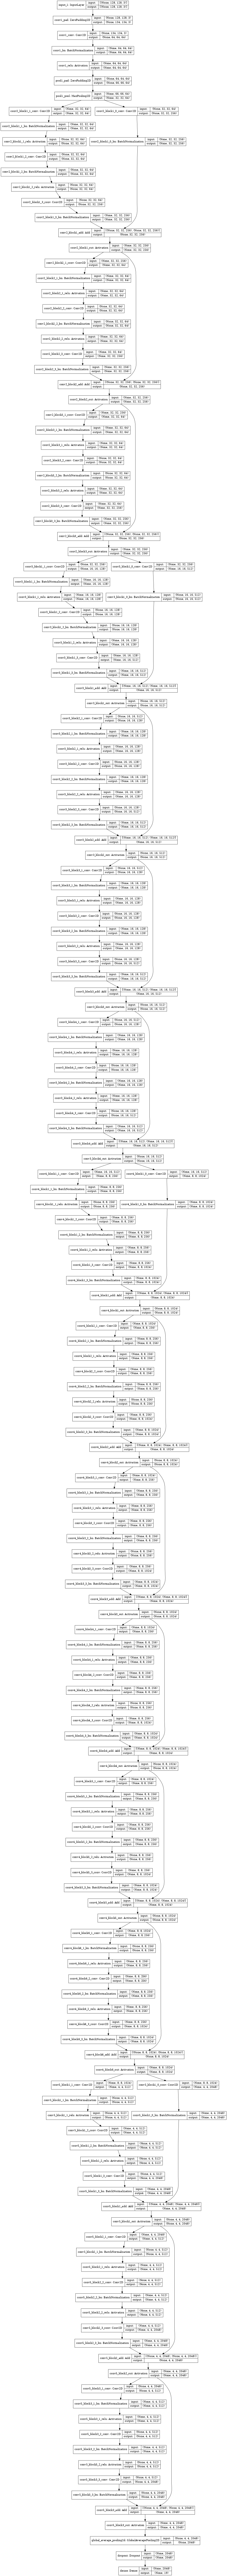

In [19]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True, dpi=48)

In [20]:
X_train[0].shape

(128, 128, 3)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau

model_checkpoint = ModelCheckpoint(
    filepath="ResNet50_model_on_underwater.h5",
    verbose=3,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# early_stopping= EarlyStopping(monitor="val_loss",patience=4,verbose=3,mode="min")

reducelrplateau= ReduceLROnPlateau(monitor='val_loss', factor=0.2,verbose=3,patience=1,mode="min", min_lr=0.001)


hist=model.fit(X_train,y_train,epochs=100,batch_size=128,validation_split=0.2,callbacks= [model_checkpoint,reducelrplateau])

2023-01-22 13:05:43.467704: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1344798720 exceeds 10% of free system memory.
2023-01-22 13:05:44.976243: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1344798720 exceeds 10% of free system memory.
2023-01-22 13:05:46.062403: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2023-01-22 13:05:52.217627: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


54/54 [==============================] - 43s 518ms/step - loss: 3.3872 - accuracy: 0.1537 - val_loss: 3.8779 - val_accuracy: 0.0526

Epoch 00001: val_accuracy improved from -inf to 0.05263, saving model to ResNet50_model_on_underwater.h5
Epoch 2/100
54/54 [==============================] - 25s 459ms/step - loss: 2.6447 - accuracy: 0.2412 - val_loss: 3.2897 - val_accuracy: 0.0556

Epoch 00002: val_accuracy improved from 0.05263 to 0.05556, saving model to ResNet50_model_on_underwater.h5
Epoch 3/100
54/54 [==============================] - 25s 471ms/step - loss: 2.4606 - accuracy: 0.2694 - val_loss: 3.2163 - val_accuracy: 0.0561

Epoch 00003: val_accuracy improved from 0.05556 to 0.05614, saving model to ResNet50_model_on_underwater.h5
Epoch 4/100
54/54 [==============================] - 24s 446ms/step - loss: 2.2566 - accuracy: 0.3225 - val_loss: 3.5465 - val_accuracy: 0.0766

Epoch 00004: val_accuracy improved from 0.05614 to 0.07661, saving model to ResNet50_model_on_underwater.h5
Epo

In [25]:
model.load_weights('./kaggle/working/ResNet50_model_on_underwater.h5')
# VGG19_model = tf.keras.models.load_model('/content/drive/MyDrive/CNN PROJECTS/MTech Research<Project>/MODELS/VGG19/VGG19_model_on_tomato.h5')

In [22]:
test_loss,test_acc=model.evaluate(X_test,y_test)
test_loss,test_acc

60/60 [==============================] - 3s 45ms/step - loss: 6.0592 - accuracy: 0.2668


(6.059206008911133, 0.2668420970439911)

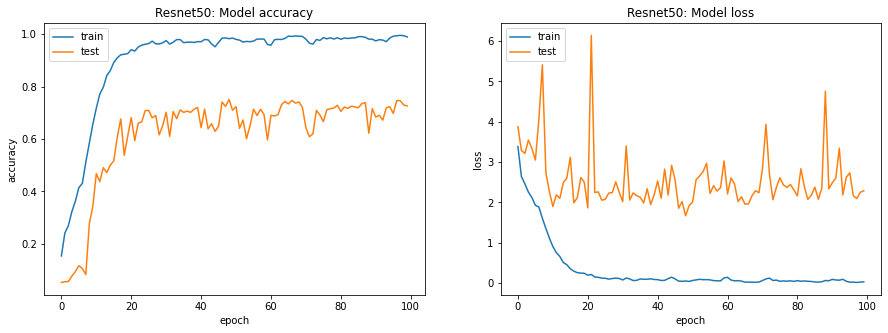

In [23]:
# Plot the accuracy and loss curves
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Resnet50: Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Resnet50: Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)



In [25]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [26]:
y_test= np.argmax(y_test,axis=-1)

In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='ResNet50:Confusion matrix',
                          cmap=plt.cm.YlOrRd):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=17)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="right",
                 color="White" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


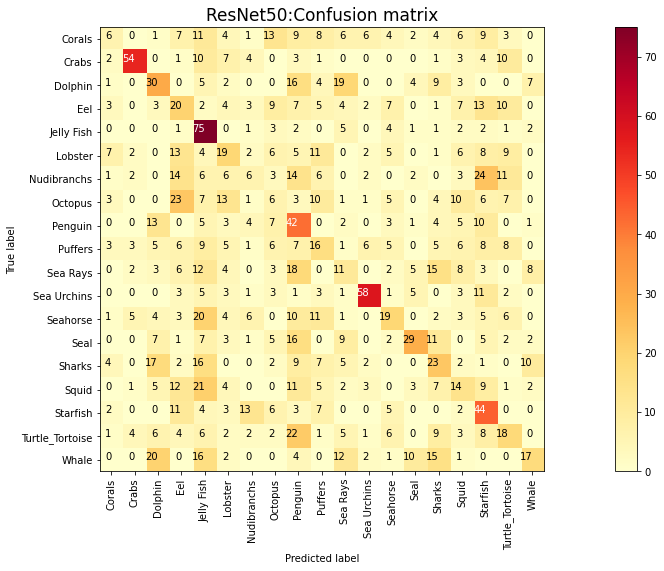

In [29]:
import itertools
plt.figure(figsize=(20,7))
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=CATEGORIES)
plt.xticks(rotation=90)
plt.savefig("ResNet50 confusion_matrix.jpg")

In [30]:
from sklearn.metrics import classification_report
print("ResNet50: Classification Report\n\n")
print(classification_report(y_test,y_pred,target_names=CATEGORIES))

ResNet50: Classification Report


                 precision    recall  f1-score   support

         Corals       0.18      0.06      0.09       100
          Crabs       0.74      0.54      0.62       100
        Dolphin       0.26      0.30      0.28       100
            Eel       0.16      0.20      0.18       100
     Jelly Fish       0.31      0.75      0.44       100
        Lobster       0.22      0.19      0.20       100
    Nudibranchs       0.13      0.06      0.08       100
        Octopus       0.08      0.06      0.07       100
        Penguin       0.21      0.42      0.28       100
        Puffers       0.17      0.16      0.16       100
       Sea Rays       0.13      0.11      0.12       100
    Sea Urchins       0.68      0.58      0.63       100
       Seahorse       0.28      0.19      0.22       100
           Seal       0.47      0.29      0.36       100
         Sharks       0.21      0.23      0.22       100
          Squid       0.16      0.14      0.15       

Sample Prediction

Predicted Label:
[14]---> Sharks


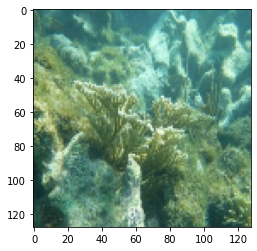

In [33]:
sample_pred=model.predict(np.array(X_test[23]).reshape(-1,128,128,3))
sample_pred = np.argmax(sample_pred, axis=-1)
print("Predicted Label:")
plt.imshow(X_test[23])
print(sample_pred,end="---> ")
print(CATEGORIES[sample_pred[0]])

In [34]:
lis=[]
for image,true,pred in zip(X_test,y_test,y_pred):
    lis.append([image,true,pred])

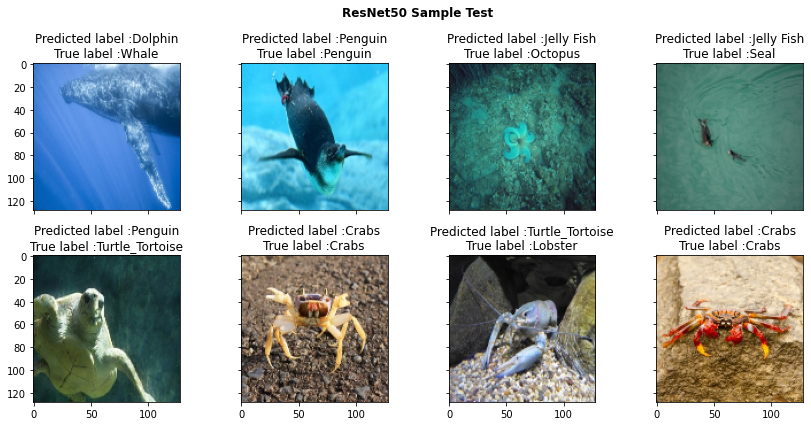

<Figure size 936x432 with 0 Axes>

In [36]:
#Monitoring the model_performance with its predictions and labels
plt.rcParams["figure.figsize"] = (13,6)
n = 0
nrows = 2
ncols = 4

fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
fig.suptitle("ResNet50 Sample Test",fontweight ="bold")
for row in range(nrows):
    for col in range(ncols):

        test_image,true_label,pred_label = random.choice(lis) #Make Sure your test image size would be (-1,128,128,3)
        
        ax[row,col].imshow(test_image)
#         sample_pred =  model.predict(np.array(test_image).reshape(-1,128,128,3))
        pred_label = pred_label
        ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(CATEGORIES[pred_label],CATEGORIES[true_label]))
        n += 1
        plt.tight_layout()
plt.show()
plt.savefig("ResNet50 Sample Test.jpeg")


In [38]:
import shutil
shutil.make_archive("VGG19_UNDERWATER", 'zip', "/kaggle/working/")

KeyboardInterrupt: 